# calculos Bono Tasa Fija

Descripción técnica de los BONOS de desarrollo del gobierno federal con tasa de interés fija:

Los Bonos de Desarrollo del Gobierno Federal con Tasa de Interés Fija (BONOS) son emitidos y
colocados a plazos mayores a un año, pagan intereses cada seis meses y, a diferencia de los
BONDES, la tasa de interés se determina en la emisión del instrumento y se mantiene fija a lo largo
de toda la vida del mismo. 

- **Valor Nominal (VN):** El valor nominal del bono = 100 (cien pesos)
- **Período de Interés (Nj):** Los títulos devengan intereses en pesos cada seis meses. Esto es, cada 182 días o al plazo que sustituya a éste en caso de días inhábiles (Plazo en días del cupón J).
- **Tasa de interés anual del cupón (TC):**  La tasa de interés que pagan estos títulos es fijada por el Gobierno Federal en la emisión de la serie.
- **Intereses por pagar al final del periodo J (Ij):** Los intereses se calculan considerando los días efectivamente transcurridos entre las fechas de pago de los mismos, tomando como base años de 360 días, y se liquidan al finalizar cada uno de los períodos de interés.


    ![Imagen](imagenes\Ij_Bonos_M.png)      ec.01

donde:

IJ = Intereses por pagar al final del periodo J

TC = Tasa de interés anual del cupón J

VN = Valor nominal del título en Unidades de Inversión

NJ = Plazo en días del cupón J

In [1]:
def calc_Ij(TC,Nj=182,VN=100):
    # Calculo de Intereses por pagar al final del periodo J 
    return VN*Nj*TC/360

## Calculos preliminares de fechas y tiempos

In [1]:
from datetime import date, timedelta

def calcular_fechas_cupon(vencimiento, emision, fecha_interes,desde_emision=True, dias=182):
    """
    Calcula las fechas de pago de cupones desde la fecha de vencimiento hasta la fecha de interés
    con plazos de 182 días (por defecto).

    Entrada:
        - vencimiento (datetime): Fecha de vencimiento del cupón.
        - emisión (datetime): Fecha de emisión del cupón o límite hasta el cual se desea calcular.
        - fecha_interes (datetime): Fecha para la cual se desea saber cuántos cupones faltan.
        - dias (int, opcional): Número de días en cada período de cupón. Valor por defecto: 182.

    Salida:
        Lista con fechas de pago de cupón.
    """
    # 1ero verificamos que la fecha de interes este en el plazo del cupon 
    if fecha_interes >=  emision and fecha_interes<=vencimiento:
        # Calculo de fechas desde la emision contando hacia adelante los dias para cada Periodo de cupon
        if desde_emision:
            #Identificacion de inicio de cupon en realacion a la fecha de interes
            cupon0 = emision
            fechas = []
            while True:
                cupon1 = cupon0 + timedelta(days=dias)
                if  cupon1 > fecha_interes:
                    fechas.append(cupon0)
                    break
                else:
                    cupon0 = cupon1
            # Contando dias desde inicio de cupon en fecha de interes
            while fechas[-1] < vencimiento:
                proximo_cupon = fechas[-1] + timedelta(days=dias)
                if proximo_cupon <= vencimiento:
                    fechas.append(proximo_cupon)
                else:
                    fechas.append(vencimiento)
            return fechas
            

         # Calculo de fechas desde el vencimiento contanto hacia atras los dias para cada Periodo de cupon        
        else:
            fechas = [vencimiento]
            while fechas[-1] > fecha_interes:
                if fecha_interes < vencimiento:
                    fecha_anterior = fechas[-1] - timedelta(days=dias)
                    if fecha_anterior > emision:
                        fechas.append(fecha_anterior)
                    else:
                        break
                else:
                    break
            fechas.reverse()
            return fechas


def calcular_dias_ultimo_cupon(fechas_cupon, fecha_analisis, dias=182):
    """
    Calcula el número de días transcurridos desde el vencimiento del último cupón hasta la fecha indicada.
    
    Entradas:
        - fechas_cupon (list): Lista con fechas de pago de cupones, preferiblemente obtenidas de la función "calcular_fechas_cupon".
        - fecha_analisis (datetime): Fecha para la cual se desea calcular el número de días.
        - dias (int, opcional): Número de días en cada período de cupón. Valor por defecto: 182.
    
    Devolución:
        Número de días transcurridos. Si se introduce una fecha incorrecta, no devuelve nada.
    """
    # Verificar que la fecha de análisis esté en el intervalo de los cupones, desde la emisión hasta el vencimiento.
    if (fechas_cupon[0] - timedelta(days=dias) < fecha_analisis < fechas_cupon[-1]):
        i = 0
        while True:
            if fecha_analisis < fechas_cupon[i]:
                dias_faltantes = (fechas_cupon[i] - fecha_analisis).days
                return dias - dias_faltantes
            else:
                i += 1


Conociendo el rendimiento a vencimiento del título, la fórmula general (1) se simplifica
enormemente debido a que las tasas rj para descontar los diferentes flujos a valor presente pasan a
ser la misma en todos los factores de descuento. Por consiguiente, una vez conocido el rendimiento
a vencimiento del título y suponiendo que el plazo en días de todos los cupones es el mismo, la
fórmula general se puede expresar de la siguiente forma:

![Imagen](imagenes\Metodo_BonosM_con_rendimiento.png)  





Para liquidar los títulos, se tiene que sumar al precio de asignación resultante en la subasta los intereses devengados del cupón vigente de
acuerdo a la siguiente fórmula:

 ![Imagen](imagenes\BonosM_interes_devengado.png)       

In [2]:
from datetime import datetime, timedelta

def calcular_precio_limpio(vencimiento, liquidacion, emision, tasa_cupon, rendimiento, valor_nominal=100, num_dias_por_cupon=182):
    """
    Calcula el precio limpio de un bono a tasa fija.

    Entradas:
        - vencimiento (datetime): Fecha de vencimiento del cupón.
        - liquidacion (datetime): Fecha para la cual se desea saber cuántos cupones faltan.
        - emisión (datetime): Fecha de emisión del cupón o límite hasta el cual se desea calcular.
        - tasa_cupon (float): Tasa de interés anual del bono.
        - rendimiento (float): Rendimiento anual esperado por el inversionista.
        - valor_nominal (float, opcional): Valor nominal del bono. Valor por defecto: 100.
        - num_dias_por_cupon (int, opcional): Número de días en cada período de cupón. Valor por defecto: 182.

    Salida:
        Precio limpio del bono.
    """
    
    def calcular_Cj(tasa_cupon, valor_nominal=100, num_dias_por_cupon=182):
        return valor_nominal * num_dias_por_cupon * tasa_cupon / 360

    def calcular_R(rendimiento):
        return rendimiento * num_dias_por_cupon / 360
    
    def calcular_interes_devengado(tasa_cupon, dias_ultimo_cupon, valor_nominal=100):
        return valor_nominal * dias_ultimo_cupon * tasa_cupon / 360
    
    
    def calc_CuponesRestantes(liquidacion,fechas_cupon):
        n = 0
        for fecha in fechas_cupon:
            if fecha > liquidacion:
                n += 1
        return n

    
    def calcular_precio_simple(C, R, K, d, valor_nominal=100, num_dias_por_cupon=182):
        """ 
        Cálculo del precio limpio de un bono a tasa fija según la fórmula (2) del APÉNDICE 2A
        Descripción técnica de los BONOS de desarrollo del gobierno federal con tasa de interés fija.
          
        Nota: El valor por defecto de num_dias_por_cupon es 182, sin embargo, este valor se debe ajustar a días hábiles. 
        """
        return (C + C * (1 / R - 1 / (R * (1 + R)**(K-1))) + valor_nominal / (1 + R)**(K-1)) / ((1 + R)**(1 - d / num_dias_por_cupon)) - C * d / num_dias_por_cupon
    
    # def calc_intDev(TC,d, VN=100):
    #     return VN*d*TC/360
    
    fechas_cupon = calcular_fechas_cupon(vencimiento, emision, liquidacion)
    
    dias_ultimo_cupon = calcular_dias_ultimo_cupon(fechas_cupon, liquidacion)
    
    C = calcular_Cj(tasa_cupon)
    
    R = calcular_R(rendimiento)  
    
    # Número de cupones por liquidar, incluyendo el vigente   
    K = calc_CuponesRestantes(liquidacion,fechas_cupon)      
    
    PrecioLimpio = calcular_precio_simple(C, R, K, dias_ultimo_cupon)
    
#     intDev = calc_intDev(tasa_cupon,dias_ultimo_cupon)
    
#     PrecioSucio = PrecioLimpio + intDev
    
    return PrecioLimpio  #,PrecioSucio


def calc_PrecioSucio(PrecioLimpio,TC,vencimiento, liquidacion,emision):
    
    def calc_intDev(TC,d, VN=100):
        return VN*d*TC/360
    
    fechas_cupon = calcular_fechas_cupon(vencimiento, emision, liquidacion)
    dias_ultimo_cupon = calcular_dias_ultimo_cupon(fechas_cupon, liquidacion)
    
    intDev = calc_intDev(TC,dias_ultimo_cupon)
    
    return PrecioLimpio + intDev


## Pruebas segun documentacion:


 ![Imagen](imagenes\BonosM_ejemplo.png)  
 
  ![Imagen](imagenes\BonosM_ejemplo2.png)  
 
 

In [3]:
# Solucion Ejemplo:
from datetime import date, timedelta

#datos del cupon
emision = date(2000, 1, 27)
vencimiento = date(2003, 1, 23)
liquidacion = date(2000, 2, 17)
TC = .18

#Tasa de rendimiento esperada (Para calc valor presente)
r = .19

#Calculo precio limpio y precio sucio
PrecioLimpio = calcular_precio_limpio(vencimiento, liquidacion, emision, TC, r)
PrecioSucio = calc_PrecioSucio(PrecioLimpio,TC,vencimiento, liquidacion,emision)

print("El precio limpio del bono es: ",round(PrecioLimpio,5)) 
print("El precio sucio del bono es: ",round(PrecioSucio,5)) 


El precio limpio del bono es:  97.76269
El precio sucio del bono es:  98.81269


 ## Ejemplos utilizando datos Vector

In [4]:
from datetime import date, timedelta
# Solucion Ejemplo:

#datos del cupon Serie 231207
emision = date(2003, 10, 30)
vencimiento = date(2023, 12, 7)
liquidacion = date(2023, 8, 31)
TC = .08

#Tasa de rendimiento esperada (Tomada de vector)
r = .11619997

#Calculo precio limpio y precio sucio
PrecioLimpio = calcular_precio_limpio(vencimiento, liquidacion, emision, TC, r)
PrecioSucio = calc_PrecioSucio(PrecioLimpio,TC,vencimiento, liquidacion,emision)

print("El precio limpio del bono es: ",round(PrecioLimpio,5)) 
print("El precio sucio del bono es: ",round(PrecioSucio,5)) 



El precio limpio del bono es:  97.93215
El precio sucio del bono es:  101.19882


##  Comprobando con todos los valores del vector:

In [5]:
import pandas as pd

df = pd.read_excel("info_Bonos\\20230831_t-1_Vector_M.xlsx")

# Seleccion de datos a analizar
df_analisis = df[['SERIE','FECHA', 'FECHA EMISION', 'FECHA VCTO','TASA CUPON','TASA DE RENDIMIENTO','PRECIO LIMPIO', 'PRECIO SUCIO']].copy()

# Convierte la columna 'FECHA' a formato datetime64[ns]'
df_analisis['FECHA'] = df_analisis.loc[:,'FECHA'].astype(str)
df_analisis['FECHA'] = pd.to_datetime(df_analisis.loc[:,'FECHA'], format='%Y%m%d')


# Calcula el precio limpio y sucio para cada valor 
df_analisis['CalcPrecioLimpio'] = df_analisis.apply(lambda x: pd.Series(calcular_precio_limpio(x['FECHA VCTO'],
                                                                                                x['FECHA'],
                                                                                                x['FECHA EMISION'],
                                                                                                x['TASA CUPON'] / 100,
                                                                                                x['TASA DE RENDIMIENTO'] / 100)), axis=1)

df_analisis['CalcPrecioSucio'] = df_analisis.apply(lambda x: pd.Series(calc_PrecioSucio(x['CalcPrecioLimpio'],
                                                                                              x['TASA CUPON'] / 100,
                                                                                              x['FECHA VCTO'],
                                                                                              x['FECHA'],
                                                                                              x['FECHA EMISION'])),axis=1)

df_analisis['error%PrecioLimpio'] = (df_analisis['PRECIO LIMPIO']-df_analisis['CalcPrecioLimpio'])*100/df_analisis['PRECIO LIMPIO']
df_analisis['error%PrecioSucio'] = (df_analisis['PRECIO SUCIO']-df_analisis['CalcPrecioSucio'])*100/df_analisis['PRECIO SUCIO']
df_analisis.sample(5)

,SERIE,FECHA,FECHA EMISION,FECHA VCTO,TASA CUPON,TASA DE RENDIMIENTO,PRECIO LIMPIO,PRECIO SUCIO,CalcPrecioLimpio,CalcPrecioSucio,error%PrecioLimpio,error%PrecioSucio
11,330526,2023-08-31,2022-12-08,2033-05-26,7.50,9.285000,88.599124,90.349124,88.599124,90.349124,4.970216e-07,4.873946e-07
2,241205,2023-08-31,2004-12-30,2024-12-05,10.00,10.880000,98.938461,101.271794,98.938461,101.271794,2.650576e-07,-7.019670e-08
10,310529,2023-08-31,2011-06-23,2031-05-29,7.75,9.345000,91.240013,93.048346,91.240013,93.048346,4.196737e-07,5.328085e-08
5,260903,2023-08-31,2023-03-09,2026-09-03,7.00,9.980000,92.319009,95.721787,92.319009,95.721787,2.500891e-07,4.733530e-07
0,231207,2023-08-31,2003-10-30,2023-12-07,8.00,11.619997,99.028317,100.894984,97.932149,101.198816,1.106924e+00,-3.011367e-01


## calculo de tasa de rendimiento anual de capitalización


Se procede a calcular la tasa de rendimiento del  bono a partir de su precio limpio, fecha de vencimiento, fecha de liquidación, fecha de emisión y tasa de cupón. Para eso utilizaremos la biblioteca `scipy.optimize` con `optimize`, el procedimiento es el siguiente:

1. Se define una función llamada `objetivo(r)` que toma una tasa de rendimiento `r` como entrada y devuelve la diferencia entre el precio limpio calculado utilizando esa tasa de rendimiento y el precio limpio proporcionado como entrad, esta función calcula la diferencia entre el precio limpio observado y el precio limpio calculado con la tasa de rendimiento `r`. El objetivo es que esta diferencia sea lo más cercana posible a cero.

2. Se utiliza la función `optimize.newton(objetivo, 0.1)` de SciPy para encontrar la tasa de rendimiento. Esta función utiliza el método de Newton para encontrar la raíz de la ecuación `objetivo(r)`, lo que en este caso significa encontrar la tasa de rendimiento que hace que la diferencia entre el precio limpio calculado y el precio limpio observado sea cero. Comienza con una suposición inicial del 10% para la tasa de rendimiento.

Este código proporciona una manera de calcular la tasa de rendimiento de un bono a partir de su precio limpio y otros parámetros utilizando la biblioteca SciPy para resolver la ecuación implícita que relaciona el precio limpio y la tasa de rendimiento.

notas: 
https://docs.scipy.org/doc//scipy-0.11.0/reference/generated/scipy.optimize.newton.html#:~:text=scipy.optimize.%20newton%20%28func%2C%20x0%2C%20fprime%3DNone%2C%20args%3D%20%28%29%2C%20tol%3D1.48e-08%2C,is%20provided%2C%20otherwise%20the%20secant%20method%20is%20used.


In [7]:
import scipy.optimize as optimize

def calc_rendimientoVencimiento(PrecioLimpio,vencimiento, liquidacion, emision, TC):
    
    # Definicion de función objetivo que encuentra la tasa de rendimiento
    def objetivo(r):
        return calcular_precio_limpio(vencimiento, liquidacion, emision, TC, r) - PrecioLimpio
    
    # Encontrar la tasa de rendimiento utilizando scipy.optimize.newton
    tasa_rendimiento = optimize.newton(objetivo, 0.1)  # Suponemos siempre una tasa inicial del 10%
    
    return tasa_rendimiento


In [8]:
# Solucion Ejemplo:

#datos del cupon
emision = date(2000, 1, 27)
vencimiento = date(2003, 1, 23)
liquidacion = date(2000, 2, 17)

TC = .18
PrecioLimpio = 97.76269

tasa_rendimiento = calc_rendimientoVencimiento(PrecioLimpio,vencimiento, liquidacion, emision, TC)
print(f"Tasa de rendimiento al vencimiento: {tasa_rendimiento * 100:.6f}%")
# tasa de rendimiento esperada 19%

Tasa de rendimiento al vencimiento: 19.000001%


In [9]:
# Solucion Ejemplo 2:

#datos del cupon Serie 231207
emision = date(2003, 10, 30)
vencimiento = date(2023, 12, 7)
liquidacion = date(2023, 8, 31)
TC = .08
PrecioLimpio = 99.02832
tasa_rendimiento = calc_rendimientoVencimiento(PrecioLimpio,vencimiento, liquidacion, emision, TC)
print(f"Tasa de rendimiento al vencimiento: {tasa_rendimiento * 100:.6f}%")

#Tasa de rendimiento esperada (Tomada de vector) r = 11.619997%

Tasa de rendimiento al vencimiento: 11.619987%


In [10]:
df_analisis['Calc_rendimiento'] = df_analisis.apply(lambda x: pd.Series(calc_rendimientoVencimiento(x['PRECIO LIMPIO'],
                                                                                                x['FECHA VCTO'],
                                                                                                x['FECHA'],
                                                                                                x['FECHA EMISION'],
                                                                                                x['TASA CUPON'] / 100)), axis=1)*100

df_analisis['error%rendimiento'] = (df_analisis['TASA DE RENDIMIENTO']-df_analisis['Calc_rendimiento'])*100/df_analisis['TASA DE RENDIMIENTO']

In [11]:
df_analisis[['TASA DE RENDIMIENTO','Calc_rendimiento','error%rendimiento']].sample(3)

,TASA DE RENDIMIENTO,Calc_rendimiento,error%rendimiento
2,10.880,10.880,2.073385e-06
5,9.980,9.980,9.434567e-07
11,9.285,9.285,8.052027e-07


## Gráficas importantes que pueden proporcionar información valiosa:


### Gráfico de Precio vs. Rendimiento: 
Esta es una de las gráficas más fundamentales para el análisis de bonos. En el eje vertical se muestra el precio del bono y en el eje horizontal se muestra su rendimiento (tasa de interés). Esta gráfica puede mostrar la relación inversa típica entre el precio y el rendimiento: cuando el rendimiento sube, el precio del bono tiende a bajar, y viceversa. La pendiente de esta curva es una medida importante llamada duración, que indica la sensibilidad del precio del bono a los cambios en las tasas de interés.

---- Bono seleccionado con las siguientes características: ---
Número de serie: 270304
Fecha de emisión: 2021-09-09
Fecha de vencimiento: 2027-03-04
Fecha de liquidación: 2023-08-31
Tasa de cupón: 0.055
Duracion Estimada: -272.3964394199155


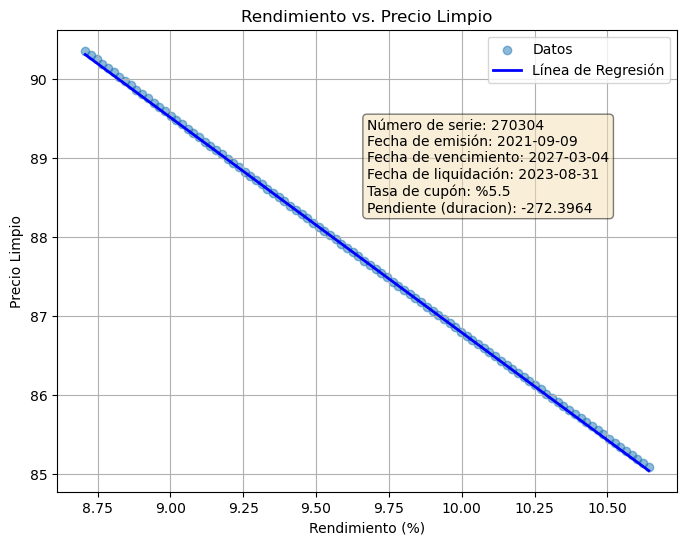

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def Graf_Precio_vs_rendimiento(emision,vencimiento,liquidacion,TC,rendimiento,serie=""):

    num_valores = 100
    x_vector = np.linspace(0.9 * rendimiento, 1.1 * rendimiento, num_valores)
    y_vector = [calcular_precio_limpio(vencimiento, liquidacion, emision, TC,r) for r in x_vector]


    def calcPendienteRegLin(X,y):
        """
        Funcion para el calculo de la pendiente de la recta obtenida 
        utilizando regression lineal con los valores de X, y
        Entrada:
        X = Puede estar en formato de lista o np array de dimesion (1,0), valores int, o float
        y = Puede estar en formato de lista o np array de dimesion (1,0), valores int, o float
        Salida:
        Pendiente 
        """
        y = np.array(y_vector)
        X = np.array(x_vector).reshape(-1, 1)

        modelo = LinearRegression()
        modelo.fit(X, y)

        # Devuelve la pendiente (coeficiente)
        return modelo.coef_[0]

    Estimado_duracion  = calcPendienteRegLin(x_vector,y_vector)

    print("---- Bono seleccionado con las siguientes características: ---")
    print("Número de serie:", serie)
    print("Fecha de emisión:", emision)
    print("Fecha de vencimiento:", vencimiento)
    print("Fecha de liquidación:", liquidacion)
    print("Tasa de cupón:", TC)
    print("Duracion Estimada:", Estimado_duracion)


    r0 = x_vector[num_valores//2]
    P0 = y_vector[num_valores//2]
    pendiente = Estimado_duracion

    def RectPrecio(r,r0,P0,pendiente):
        return pendiente*(r-r0) + P0
    P_regLin = [RectPrecio(x_vector[x],r0,P0,pendiente)   for x in range(num_valores)]

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.scatter(x_vector * 100, y_vector, alpha=0.5, label='Datos')
    plt.title('Rendimiento vs. Precio Limpio')
    plt.xlabel('Rendimiento (%)')
    plt.ylabel('Precio Limpio')
    plt.plot(x_vector * 100, P_regLin, color='blue', lw=2, label='Línea de Regresión')

    # Agregar leyenda con los datos
    leyenda_texto = (
        f"Número de serie: {serie}\n"
        f"Fecha de emisión: {emision}\n"
        f"Fecha de vencimiento: {vencimiento}\n"
        f"Fecha de liquidación: {liquidacion}\n"
        f"Tasa de cupón: %{TC*100}\n"
        f"Pendiente (duracion): {Estimado_duracion:.4f}"
    )

    plt.grid(True)

    # Mostrar el gráfico con la leyenda
    plt.legend(loc='best')
    plt.text(0.5, .6, leyenda_texto, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    plt.show()
    
    
    
eleccion = np.random.randint(1, df_analisis.shape[0])
serie = df_analisis.loc[eleccion, 'SERIE']
emision = df_analisis.loc[eleccion, 'FECHA EMISION'].date()
vencimiento = df_analisis.loc[eleccion, 'FECHA VCTO'].date()
liquidacion = df_analisis.loc[eleccion, 'FECHA'].date()
TC = df_analisis.loc[eleccion, 'TASA CUPON']/100
rendimiento = df_analisis.loc[eleccion, 'TASA DE RENDIMIENTO']/100

Graf_Precio_vs_rendimiento(emision,vencimiento,liquidacion,TC,rendimiento,serie)

## Curva de Rendimiento: 
Esta gráfica muestra las tasas de rendimiento de bonos similares en diferentes vencimientos. Puede tomar la forma de una curva ascendente (normal), una curva plana o una curva descendente (inversa). La forma de la curva de rendimiento puede indicar las expectativas del mercado sobre las tasas de interés futuras y la salud de la economía.

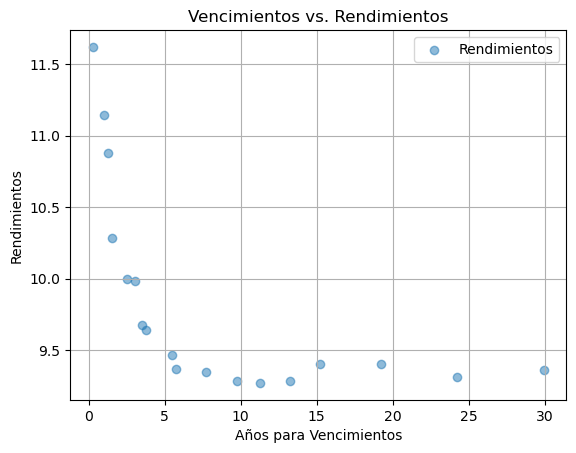

In [25]:
import pandas as pd

def Graf_CurvaRendimiento(dir_vector = "info_Bonos\\20230831_t-1_Vector_M.xlsx"):

    df = pd.read_excel(dir_vector)
    df_analisis['Calc_rendimiento'] = df_analisis.apply(lambda x: pd.Series(calc_rendimientoVencimiento(x['PRECIO LIMPIO'],
                                                                                                    x['FECHA VCTO'],
                                                                                                    x['FECHA'],
                                                                                                    x['FECHA EMISION'],
                                                                                                    x['TASA CUPON'] / 100)), axis=1)*100
    def tiempo(fecha, vencimiento):
        # Convierte las columnas en objetos datetime
        fecha = pd.to_datetime(fecha)
        vencimiento = pd.to_datetime(vencimiento)

        # Calcula la diferencia entre las fechas en días
        diferencia = (vencimiento - fecha).dt.days

        # Convierte los días en años (asumiendo un año de 365 días)
        tiempo_en_anios = diferencia / 365

        return list(tiempo_en_anios.astype(float))  # Convierte a años como entero

    x = tiempo(df_analisis['FECHA'], df_analisis['FECHA VCTO'])
    y = df_analisis['Calc_rendimiento']

    # Crear el gráfico
    plt.scatter(x, y, alpha=0.5, label='Rendimientos')
    plt.title('Vencimientos vs. Rendimientos')
    plt.xlabel('Años para Vencimientos')
    plt.ylabel('Rendimientos')

    plt.grid(True)
    plt.legend(loc='best')

    plt.show()
    
Graf_CurvaRendimiento()

## Otras graficas

### Duración vs. Vencimiento: 
Este gráfico muestra cómo la duración (que mide la sensibilidad del precio a los cambios en las tasas de interés) varía en función del tiempo hasta el vencimiento. Puede ayudar a identificar bonos que son más o menos sensibles a los cambios en las tasas de interés a medida que se acerca su vencimiento.

### Cupones vs. Precio: 
Este gráfico muestra cómo el precio de los bonos varía en función de sus tasas de cupón. Los bonos con tasas de cupón más altas generalmente tienen menos sensibilidad a los cambios en las tasas de interés en comparación con los bonos con tasas de cupón más bajas.

### Gráfico de Volatilidad Histórica: 
Puede mostrar cómo la volatilidad del precio del bono ha variado con el tiempo. Esto es especialmente útil para evaluar el riesgo de precio de un bono.

### Rendimiento al Vencimiento (YTM) vs. Tasa de Cupón: 
Este gráfico puede mostrar cómo varía el rendimiento al vencimiento en relación con las tasas de cupón. Los bonos con tasas de cupón más bajas generalmente tienen YTMs más altos y viceversa.

### Rendimiento al Vencimiento (YTM) vs. Vencimiento: 
Muestra cómo varía el YTM en función del tiempo hasta el vencimiento. Puede proporcionar información sobre las expectativas del mercado y la forma de la curva de rendimiento.


# Pruebas vector usando M_TASA_FIJA.py

In [1]:
from M_TASA_FIJA import M_TasaFija

from datetime import datetime, date
import pandas as pd
import numpy as np 

def cargarInfoBono(num_serie,archivo = "20230831_t-1_Vector_M.xlsx"):
    df_vectorInvex = pd.read_excel(archivo)
    serie = [ x for x in ['Serie','SERIE'] if x in df_vectorInvex.columns][0]
    bono_analizar = df_vectorInvex[df_vectorInvex[serie] == num_serie].reset_index(drop=True)
    info_bono_analizar = {}
    for key in bono_analizar.columns:
        val = bono_analizar.loc[0,key]
        info_bono_analizar[key] = val 
    return info_bono_analizar


#prueba 
#num_serie = 310529
num_serie = 260903
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = M_TasaFija(infoBono)

print(f"Serie: {num_serie}")
      
PrecioLimpioCalculado = BonoEnEvaluacion.calcPrecioLimpio()
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']      
print(f"PrecioLimpioCalculado =  {PrecioLimpioCalculado}, PrecioLimpioVector = {PrecioLimpioVector}")
      
RendimientoCalculado = BonoEnEvaluacion.calcRendimiento()
RendimientoVector =  BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
print(f"RendimientoCalculado =  {RendimientoCalculado}, RendimientoVector = {RendimientoVector}")

Serie: 260903
PrecioLimpioCalculado =  92.319009, PrecioLimpioVector = 92.319009
RendimientoCalculado =  9.98, RendimientoVector = 9.98


## Revision de todos los bonos en vector

In [3]:
import pandas as pd
import math

# Revision de todos los bonos en vector
def series(archivo = "20230831_t-1_Vector_M.xlsx"):
    df_vectorInvex = pd.read_excel(archivo)
    serie = [ x for x in ['Serie','SERIE'] if x in df_vectorInvex.columns][0]
    return list(df_vectorInvex[serie])


# tol = 1e-6
# Error = False
# for num_serie in series():
#     infoBono = cargarInfoBono(num_serie)
#     BonoEnEvaluacion = M_TasaFija(infoBono)
#     PrecioLimpioCalculado = BonoEnEvaluacion.calcPrecioLimpio()
#     PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio'] 
#     RendimientoCalculado = BonoEnEvaluacion.calcRendimiento()
#     RendimientoVector =  BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
#     if (not math.isclose(PrecioLimpioCalculado, PrecioLimpioVector, rel_tol=tol, abs_tol=tol) or not math.isclose(RendimientoCalculado, RendimientoVector, rel_tol=tol, abs_tol=tol)):
#         Error = True
#         print(f"Serie: {num_serie}, PrecioLimpioCalculado =  {PrecioLimpioCalculado}, PrecioLimpioVector = {PrecioLimpioVector},RendimientoCalculado =  {RendimientoCalculado}, RendimientoVector = {RendimientoVector} ")
# if not Error:
#     print(f"Todos los calculos coinciden con una exactitud de {tol} digitos significativos")     
    
    
    
    
tol = 1e-6
for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = M_TasaFija(infoBono)
    PrecioLimpioCalculado = BonoEnEvaluacion.calcPrecioLimpio()
    PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio'] 
    RendimientoCalculado = BonoEnEvaluacion.calcRendimiento()
    RendimientoVector =  BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']

    print(f"Serie: {num_serie}, PrecioLimpioCalculado =  {PrecioLimpioCalculado}, PrecioLimpioVector = {PrecioLimpioVector})")
    print(f"RendimientoCalculado =  {RendimientoCalculado}, RendimientoVector = {RendimientoVector} ")

    print(BonoEnEvaluacion.verCalculos()['PrecioLimpio'])
    print(BonoEnEvaluacion.calcular_fechas_cupon()[0],BonoEnEvaluacion.calcular_fechas_cupon()[1],"...",BonoEnEvaluacion.verInfoBono()['CuponesCobrar'],BonoEnEvaluacion.Num_cupones_por_liquidar() , "....",BonoEnEvaluacion.calcular_fechas_cupon()[-1])
    print(BonoEnEvaluacion.calcular_fechas_ultimo_cupon()[0],"----",BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'],BonoEnEvaluacion.calcular_dias_ultimo_cupon()  ,"----",BonoEnEvaluacion.calcular_fechas_ultimo_cupon()[-1] )
    print()      

Serie: 231207, PrecioLimpioCalculado =  99.028317, PrecioLimpioVector = 99.028317)
RendimientoCalculado =  11.62, RendimientoVector = 11.619997 
{'PrecioLimpio': 99.028317316799, 'TasaCupon': 0.08, 'TasaDeRendimiento': 0.11619997, 'DiasTranscCpn': 84, 'CuponesCobrar': 1, 'FrecCpn': 182, 'ValorNominal': 100}
2023-06-08 2023-12-07 ... 1 1 .... 2023-12-07
2023-06-08 ---- 84 84 ---- 2023-08-30

Serie: 240905, PrecioLimpioCalculado =  97.012561, PrecioLimpioVector = 97.012561)
RendimientoCalculado =  11.145, RendimientoVector = 11.145 
{'PrecioLimpio': 97.01256126625401, 'TasaCupon': 0.08, 'TasaDeRendimiento': 0.11145, 'DiasTranscCpn': 175, 'CuponesCobrar': 3, 'FrecCpn': 182, 'ValorNominal': 100}
2023-03-09 2023-09-07 ... 3 3 .... 2024-09-05
2023-03-09 ---- 175 175 ---- 2023-08-30

Serie: 241205, PrecioLimpioCalculado =  98.938461, PrecioLimpioVector = 98.938461)
RendimientoCalculado =  10.88, RendimientoVector = 10.88 
{'PrecioLimpio': 98.93846073775613, 'TasaCupon': 0.1, 'TasaDeRendimient

# Calculo de regresos

In [ ]:
fechaActual = '27/09/2023'
precioSucio = BonoEnEvaluacion.verInfoBono()['PrecioSucio']
tasacupon = BonoEnEvaluacion.verInfoBono()['PrecioSucio']


Tasa_Reporto = valorInput [%]
plazoReporto = valorInput (int)
num_titulos = valorInput(int)

# calculo valor futuro 
precio sucio con tas fondeo para los dias de fondeo

y se calcula la tasa de rendimiento con nuevo precio sucio.

